In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [5]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data - std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data/std

In [6]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력 뉴런 1개 (회귀 문제)

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# 모델 학습
history = model.fit(train_data, train_labels, epochs=30, batch_size=1, validation_split=0.2)

Epoch 1/30
323/323 [==============================] - 11s 2ms/step - loss: 106.9057 - mae: 7.3557 - val_loss: 73.0830 - val_mae: 5.7237
Epoch 2/30
323/323 [==============================] - 1s 2ms/step - loss: 78.7027 - mae: 6.4305 - val_loss: 53.7318 - val_mae: 4.6478
Epoch 3/30
323/323 [==============================] - 1s 2ms/step - loss: 63.8148 - mae: 5.5635 - val_loss: 52.0301 - val_mae: 4.8163
Epoch 4/30
323/323 [==============================] - 1s 2ms/step - loss: 50.8087 - mae: 5.3150 - val_loss: 72.7723 - val_mae: 6.1795
Epoch 5/30
323/323 [==============================] - 1s 2ms/step - loss: 46.0539 - mae: 4.7657 - val_loss: 46.5009 - val_mae: 4.5332
Epoch 6/30
323/323 [==============================] - 1s 2ms/step - loss: 43.1792 - mae: 4.6956 - val_loss: 40.4462 - val_mae: 4.1901
Epoch 7/30
323/323 [==============================] - 1s 2ms/step - loss: 38.5991 - mae: 4.4700 - val_loss: 39.0355 - val_mae: 4.2765
Epoch 8/30
323/323 [==============================] - 1s 2ms

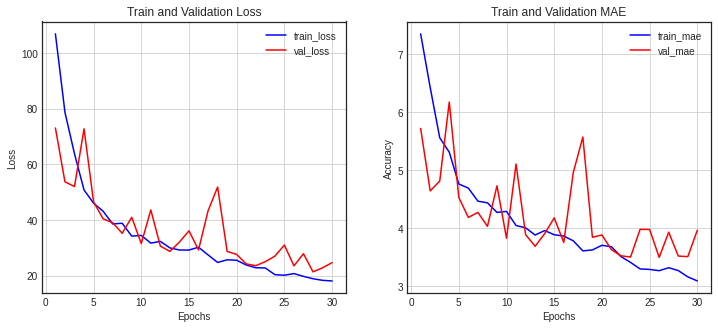

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)

# 평가 결과 출력
print("평균 제곱 오차 (MSE):", test_loss)
print("평균 절대 오차 (MAE):", test_mae)

4/4 [==============================] - 0s 16ms/step - loss: 492.3060 - mae: 20.9919
평균 제곱 오차 (MSE): 492.3059997558594
평균 절대 오차 (MAE): 20.991859436035156


# 로이터 딥러닝 모델

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [12]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
val_data = train_data[:int(0.25 * len(train_data))]
val_labels = train_labels[:int(0.25 * len(train_labels))]

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2245
2246
46


In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from keras.preprocessing.text import Tokenizer

def one_hot_encoding(data, dim=10000):
    tokenizer = Tokenizer(num_words=dim)
    tokenizer.fit_on_texts(data)
    sequences = tokenizer.texts_to_sequences(data)
    one_hot_results = np.zeros((len(data), dim))
    for i, sequence in enumerate(sequences):
        one_hot_results[i, sequence] = 1
    return one_hot_results

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(train_labels)
y_val_categorical = to_categorical(val_labels)
y_test_categorical = to_categorical(test_labels)

In [15]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
  Dense(128, activation='relu', input_shape=(10000,)),
  BatchNormalization(),
  Dropout(0.5),
  Dense(64, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  Dense(46, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [18]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 체크포인트 파일을 생성합니다.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')

# 조기 종료를 설정합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# 콜백 함수를 정의합니다.
callbacks_list = [checkpoint, early_stopping]

# 모델 학습
model.fit(x_train, y_train_categorical, epochs=30, batch_size=128, validation_data=(x_val, y_val_categorical), callbacks=callbacks_list)

# 학습된 모델을 테스트 데이터로 평가합니다.
score = model.evaluate(x_test, y_test_categorical)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'filepath' is not defined

KeyError: 'accuracy'

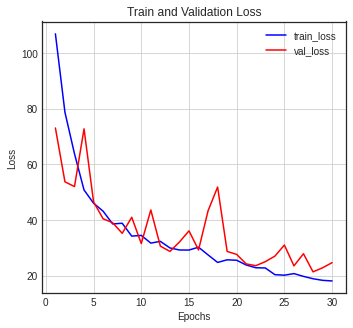

In [19]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("테스트 손실:", test_loss)
print("테스트 정확도:", test_accuracy)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

# 로이터 딥러닝 모델 과제는 완료하지 못했습니다.

# CIFAR10 

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [22]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# cifar10 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# 훈련 데이터의 20%를 검증 데이터로 분리
x_train_full, x_test, y_train_full, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
학습 데이터: (32000, 32, 32, 3) 레이블: (32000, 1)
검증 데이터: (8000, 32, 32, 3) 레이블: (8000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [23]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

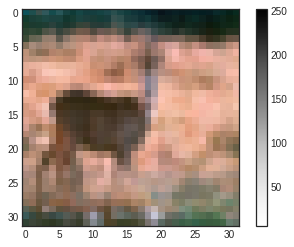

In [24]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [25]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(32000, 32, 32, 3)
(8000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# 데이터 형태 변형
x_train = x_train.reshape((len(x_train), 32 * 32 * 3))
x_val = x_val.reshape((len(x_val), 32 * 32 * 3))
x_test = x_test.reshape((len(x_test), 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(32000, 3072)
(8000, 3072)
(10000, 3072)


In [27]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [28]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(32 * 32 * 3,)))  # 입력의 형태는 32 * 32 * 3
model.add(layers.BatchNormalization())  # BatchNormalization 층 추가
model.add(layers.Dropout(0.5))  # Dropout 층 추가
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())  # BatchNormalization 층 추가
model.add(layers.Dropout(0.5))  # Dropout 층 추가
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())  # BatchNormalization 층 추가
model.add(layers.Dropout(0.5))  # Dropout 층 추가
model.add(layers.Dense(10, activation='softmax'))  # 출력 뉴런 수는 클래스 개수인 10개

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 3072)              12288     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)              

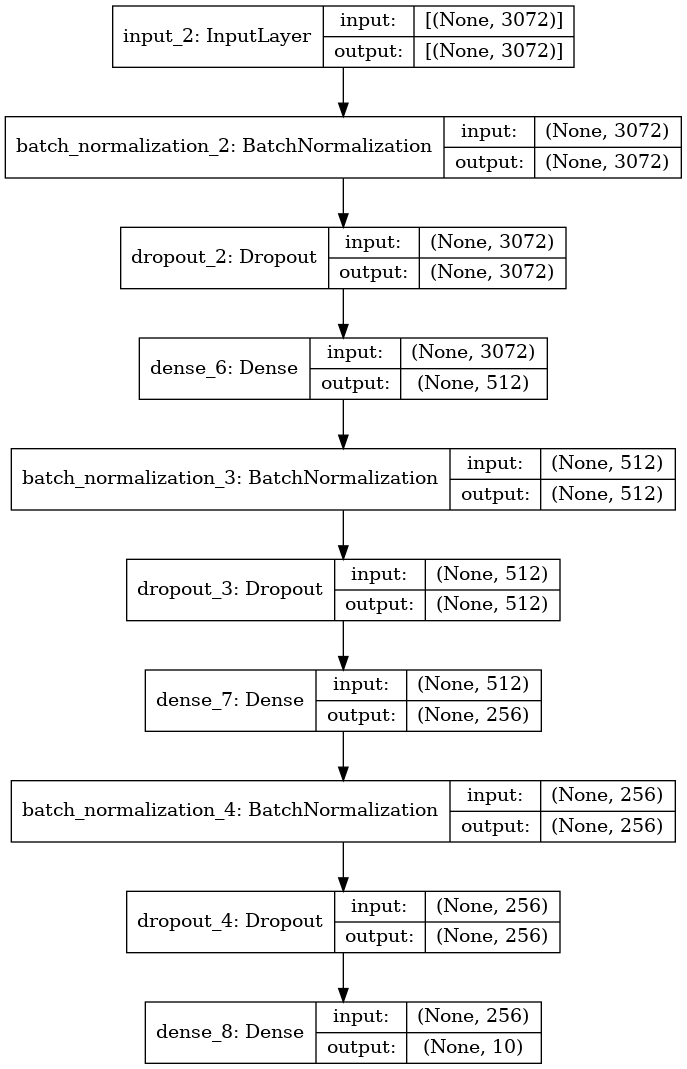

In [30]:
utils.plot_model(model, show_shapes=True)

In [31]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백: 검증 손실이 가장 낮을 때 모델 저장
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)

# EarlyStopping 콜백: 검증 손실이 4번 연속으로 향상되지 않을 때 학습 중단
early_stopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
250/250 [==============================] - 3s 6ms/step - loss: 2.2732 - accuracy: 0.2803 - val_loss: 1.7442 - val_accuracy: 0.3806
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 1.8268 - accuracy: 0.3590 - val_loss: 1.5848 - val_accuracy: 0.4389
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 1.6917 - accuracy: 0.3943 - val_loss: 1.5385 - val_accuracy: 0.4515
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 1.6236 - accuracy: 0.4201 - val_loss: 1.5050 - val_accuracy: 0.4634
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 1.5819 - accuracy: 0.4334 - val_loss: 1.4650 - val_accuracy: 0.4785
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 1.5584 - accuracy: 0.4412 - val_loss: 1.4575 - val_accuracy: 0.4816
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 1.5278 - accuracy: 0.4509 - val_loss: 1.4377 - val_accuracy: 0.4890
Epoch 

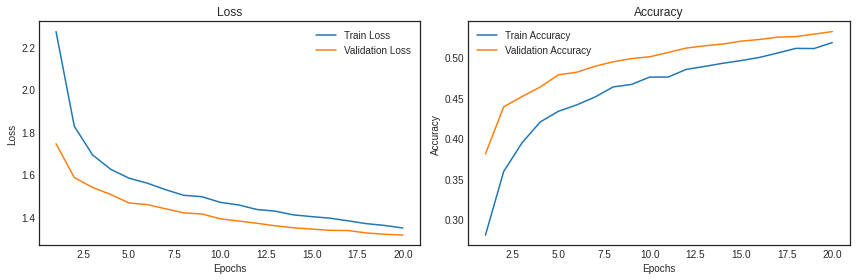

In [32]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 학습 히스토리 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3115 - accuracy: 0.5274


[1.3114885091781616, 0.527400016784668]